### Import modules 

In [6]:
%matplotlib inline

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import csv 
import os
from PIL import Image

### Load MNIST Fashion data 

In [22]:
path = '/some/dir/'

with open(path + 'fashion-mnist_train.csv') as csvfile:
    clothing_reader = csv.reader(csvfile)
    next(clothing_reader)
    clothing_list=list(clothing_reader)

In [23]:
clothing_list = [[int(j) for j in i] for i in clothing_list]

In [24]:
len(clothing_list) #60,000 images for train
                   #10,000 images for validation

60000

In [7]:
# Sample to work off of
#clothing_list_sample = clothing_list[:10]

### Create seperate class list

In [25]:
classes = [[] for i in range(10)]

for i in clothing_list:
    for j in range(10):
        if int(i[0]) == j:
            classes[j].append(i[1:])
            break
        else:
            continue

### Convert lists to numpy arrays

In [27]:
for cl in classes:
    for idx,image in enumerate(cl):
        cl[idx] = np.reshape((np.array(image)),(28,28))

### Plot sample images from each class
    Class Description
    0	T-shirt/top
    1	Trouser
    2	Pullover
    3	Dress
    4	Coat
    5	Sandal
    6	Shirt
    7	Sneaker
    8	Bag
    9	Ankle boot

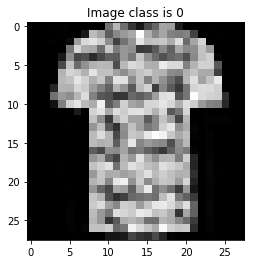

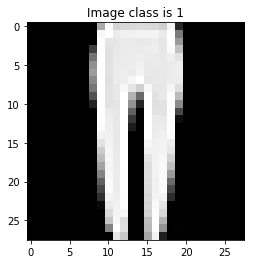

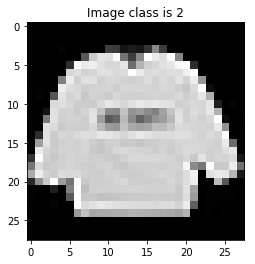

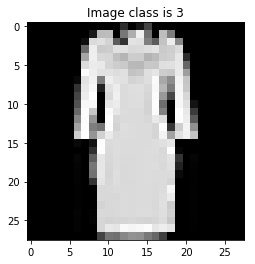

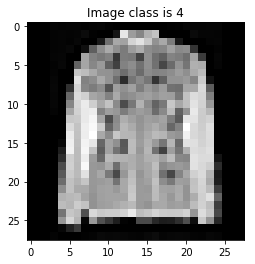

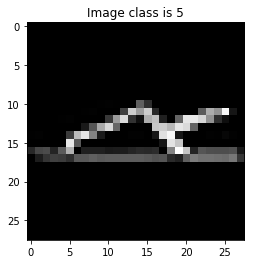

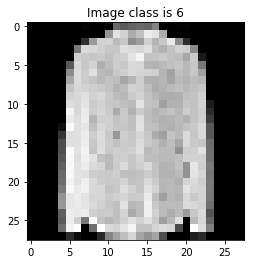

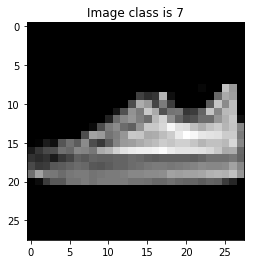

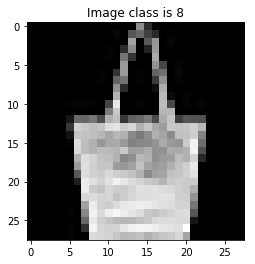

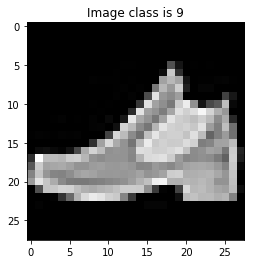

In [29]:
for i,cl in enumerate(classes):
    plt.title('Image class is {}'.format(i))
    plt.imshow(cl[0], cmap='gray')
    plt.show()

### Save each image to corresponding class directory 

In [30]:
for idx,cl in enumerate(classes):
    os.makedirs(path + 'mnist_fashion_train_png/class{}'.format(idx))
    for num,image in enumerate(cl):
        im = Image.fromarray(image.astype('uint8'))
        im = im.convert('L')
        im.save(path + 'mnist_fashion_train_png/class{idx}/img{num}.png'.format(idx=idx,num=num), 'PNG')